Successfully loaded fake_news_dataset.csv

Dropped 0 rows with missing data.

Task: Predict 'num_shares' using 11 features.
Total samples: 4000

Training samples: 3200
Test samples:     800

Training the Linear Regression model...
Evaluating model performance on the test set...

--- Model Evaluation Results ---
R-squared (R²):     -0.0046
Mean Squared Error (MSE): 216428498.18
Root Mean Squared Error (RMSE): 14711.51
--------------------------------

--- Interpretation ---
R-squared (R²): This model explains -0.46% of the variance in 'num_shares'.
RMSE: On average, the model's prediction of 'num_shares' is off by ~14712 shares.
--------------------------------

Generating graphical representations...


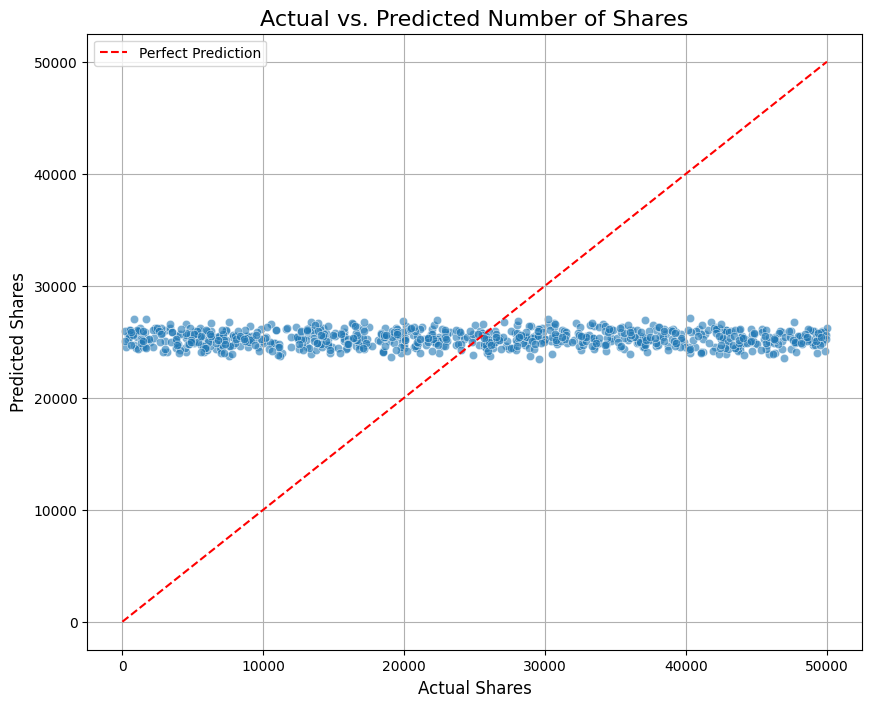

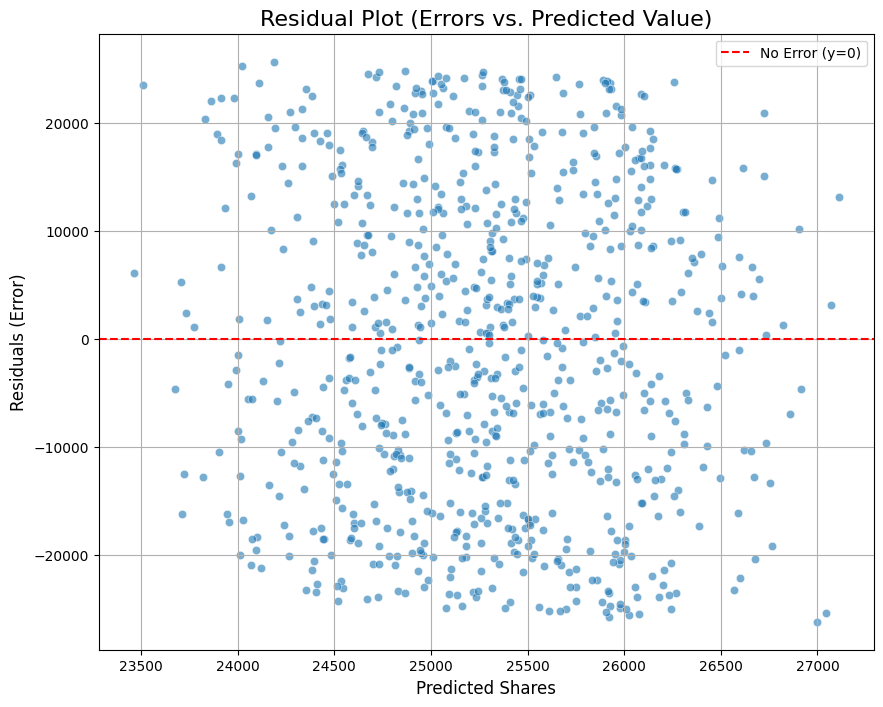


Analysis complete.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

def run_linear_regression():
    """
    Loads the fake news dataset, trains a linear regression model
    to predict 'num_shares', and evaluates its performance.
    """

    # --------------------------
    # 1. Load and Prepare Data
    # --------------------------
    try:
        df = pd.read_csv("fake_news_dataset.csv")
        print("Successfully loaded fake_news_dataset.csv\n")
    except FileNotFoundError:
        print("Error: fake_news_dataset.csv not found.")
        print("Please make sure the file is in the same directory as the script.")
        return

    # Define the regression task:
    # Predict 'num_shares' (y) using these numerical features (X).
    features_list = [
        'sentiment_score', 'word_count', 'char_count', 'has_images',
        'has_videos', 'readability_score', 'num_comments',
        'trust_score', 'source_reputation', 'clickbait_score', 'plagiarism_score'
    ]
    target = 'num_shares'

    # Clean the data: drop rows where our target or features are missing
    all_cols = features_list + [target]
    original_count = len(df)
    df.dropna(subset=all_cols, inplace=True)
    print(f"Dropped {original_count - len(df)} rows with missing data.")

    X = df[features_list]
    y = df[target]

    print(f"\nTask: Predict '{target}' using {len(features_list)} features.")
    print(f"Total samples: {len(y)}\n")

    # --------------------------
    # 2. Split Data
    # --------------------------
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"Training samples: {len(X_train)}")
    print(f"Test samples:     {len(X_test)}\n")

    # --------------------------
    # 3. Create Model Pipeline
    # --------------------------

    # We create a pipeline to chain preprocessing and the model.
    # Step 1: StandardScaler - Scales features to have mean 0 and variance 1.
    #                        This helps the linear regression model converge.
    # Step 2: LinearRegression - The model itself.

    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ])

    # --------------------------
    # 4. Train the Model
    # --------------------------
    print("Training the Linear Regression model...")
    pipeline.fit(X_train, y_train)

    # --------------------------
    # 5. Evaluate the Model
    # --------------------------
    print("Evaluating model performance on the test set...")
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("\n--- Model Evaluation Results ---")
    print(f"R-squared (R²):     {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("--------------------------------")

    # Interpretation
    print("\n--- Interpretation ---")
    print(f"R-squared (R²): This model explains {r2*100:.2f}% of the variance in 'num_shares'.")
    print(f"RMSE: On average, the model's prediction of 'num_shares' is off by ~{rmse:.0f} shares.")
    print("--------------------------------\n")


    # --------------------------
    # 6. Graphical Representations
    # --------------------------
    print("Generating graphical representations...")

    # Plot 1: Actual vs. Predicted
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

    # Add a 45-degree line for reference (perfect prediction)
    line_max = max(y_test.max(), y_pred.max())
    plt.plot([0, line_max], [0, line_max], 'r--', label='Perfect Prediction')

    plt.title('Actual vs. Predicted Number of Shares', fontsize=16)
    plt.xlabel('Actual Shares', fontsize=12)
    plt.ylabel('Predicted Shares', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 2: Residual Plot
    # Residuals are the errors (y_test - y_pred)
    residuals = y_test - y_pred

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)

    # Add a horizontal line at y=0 (no error)
    plt.axhline(0, color='r', linestyle='--', label='No Error (y=0)')

    plt.title('Residual Plot (Errors vs. Predicted Value)', fontsize=16)
    plt.xlabel('Predicted Shares', fontsize=12)
    plt.ylabel('Residuals (Error)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\nAnalysis complete.")


if __name__ == "__main__":
    run_linear_regression()